In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# We import the data
df = pd.read_csv('data/processed_data.csv', usecols=['text', 'date', 'favorited', 'retweeted', 'replies', 'user', 'lang'])

df.head()

,text,date,favorited,retweeted,replies,user,lang
0,"Los ""pollos"" queremos un Presidente ""pollo"". U...",2018-01-27 22:24:45,629,336,85,708108228568207360,es
1,Vota por @IvanDuque en la consulta @CeDemocrat...,2018-01-27 21:51:25,793,535,136,149281495,es
2,Compartimos con alegría nuestra propuesta de p...,2018-01-27 21:50:15,188,119,4,77653794,es
3,.@FNAraujoR #4 Senado @IvanDuque #ElCandidato...,2018-01-27 21:46:13,34,27,2,1069678676,es
4,The girls flocking to see Mr. Duque. That's g...,2018-01-27 20:54:10,1,0,0,876674787115925504,en


In [5]:
# Again, we convert the date column into dates
df['date'] = pd.to_datetime(df['date'])

# And set it as the index
df.set_index('date', inplace=True)

df.head()

,text,favorited,retweeted,replies,user,lang
date,,,,,,
2018-01-27 22:24:45,"Los ""pollos"" queremos un Presidente ""pollo"". U...",629,336,85,708108228568207360,es
2018-01-27 21:51:25,Vota por @IvanDuque en la consulta @CeDemocrat...,793,535,136,149281495,es
2018-01-27 21:50:15,Compartimos con alegría nuestra propuesta de p...,188,119,4,77653794,es
2018-01-27 21:46:13,.@FNAraujoR #4 Senado @IvanDuque #ElCandidato...,34,27,2,1069678676,es
2018-01-27 20:54:10,The girls flocking to see Mr. Duque. That's g...,1,0,0,876674787115925504,en


## Adding columns to identify the mentioned candidates

As with the analyzing the data notebook, we'll add a couple of columns to indicate which of the candidates are mentioned on each tweet.

In [6]:
df['mentions_duque'] = df['text'].str.lower().str.contains('@ivanduque')
df['mentions_petro'] = df['text'].str.lower().str.contains('@petrogustavo')

# Let's set those columns as boolean
df['mentions_duque'] = df['mentions_duque'].astype('bool')
df['mentions_petro'] = df['mentions_petro'].astype('bool')

df.head()

,text,favorited,retweeted,replies,user,lang,mentions_duque,mentions_petro
date,,,,,,,,
2018-01-27 22:24:45,"Los ""pollos"" queremos un Presidente ""pollo"". U...",629,336,85,708108228568207360,es,True,False
2018-01-27 21:51:25,Vota por @IvanDuque en la consulta @CeDemocrat...,793,535,136,149281495,es,True,False
2018-01-27 21:50:15,Compartimos con alegría nuestra propuesta de p...,188,119,4,77653794,es,False,False
2018-01-27 21:46:13,.@FNAraujoR #4 Senado @IvanDuque #ElCandidato...,34,27,2,1069678676,es,True,False
2018-01-27 20:54:10,The girls flocking to see Mr. Duque. That's g...,1,0,0,876674787115925504,en,False,False


## Removing tweets created by the candidates

Now, as in the previous notebook, we will remove the tweets created by the candidates themselves.

In [7]:
df.drop(df[(df['user'] == 77653794) | (df['user'] == 49849732)].index, axis=0, inplace=True)

# Creating a part-of-speech (POS) tagger

Now, in order to see if some POS tags are more frequent than others in general or if it varies from one candidate to the other, we'll create a POS tagger and apply it over the corpus of our text.

for this section you'll need NLKT, and the cess_esp corpus downloaded.

You can download it by running (from a Python console or script):

```python
import nltk
nltk.download('cess_esp')
```

Victor Peinado provided a mapping from the whole spanish tagset to the universal tagset. I think it's part of the AnCora corpus, and you can download it from [here](https://github.com/vitojph/kschool-nlp-13/blob/master/data/es-ancora.map)

After downloading it, you should place it in the `universal_tagset` folder of NLTK like this:

```bash
$ cd /path/to/your/downloaded/file
$ cp es-ancora.map ~/nltk_data/taggers/universal_tagset
```

And with all that, you should be good to go.

In [14]:
# We import NLTK and the cess_esp corpus
import nltk
from nltk.corpus import cess_esp

# We specify that the corpus should use the 'es-ancora' tagset
cess_esp._tagset = 'es-ancora'

# We get the tagged sentences from the corpus
tagged_sents = cess_esp.tagged_sents(tagset='universal')

# Let's look what one of those looks like
print(tagged_sents[0])

[('El', 'DET'), ('grupo', 'NOUN'), ('estatal', 'ADJ'), ('Electricité_de_France', 'NOUN'), ('-Fpa-', '.'), ('EDF', 'NOUN'), ('-Fpt-', '.'), ('anunció', 'VERB'), ('hoy', 'ADV'), (',', '.'), ('jueves', 'X'), (',', '.'), ('la', 'DET'), ('compra', 'NOUN'), ('del', 'ADP'), ('51_por_ciento', 'NUM'), ('de', 'ADP'), ('la', 'DET'), ('empresa', 'NOUN'), ('mexicana', 'ADJ'), ('Electricidad_Águila_de_Altamira', 'NOUN'), ('-Fpa-', '.'), ('EAA', 'NOUN'), ('-Fpt-', '.'), (',', '.'), ('creada', 'ADJ'), ('por', 'ADP'), ('el', 'DET'), ('japonés', 'ADJ'), ('Mitsubishi_Corporation', 'NOUN'), ('para', 'ADP'), ('poner_en_marcha', 'VERB'), ('una', 'DET'), ('central', 'NOUN'), ('de', 'ADP'), ('gas', 'NOUN'), ('de', 'ADP'), ('495', 'X'), ('megavatios', 'NOUN'), ('.', '.')]


In [16]:
# Now, we define a size for the train set
size = int(len(tagged_sents) * 0.9)

# And split the corpus into train and test sets using the defined size
train, test = tagged_sents[:size], tagged_sents[size:]

## Naive solution

For our first naive solution we'll create a default tagger, to classify everything as a noun.

We'll then create a unigram tagger trained on the train set, and use the default tagger as a backoff.

In [18]:
# We create the default tagger, to tag everything as a noun
default_tagger = nltk.DefaultTagger('NOUN')

In [20]:
# We create a unigram tagger, trained with the train set, and using the default_tagger as a backoff
unigram_tagger = nltk.UnigramTagger(train, backoff=default_tagger)

Now let's take a look at how this tagger performs against the test set and against our data

In [37]:
unigram_tagger.evaluate(test)

0.8808672009158558

Well this isn't bad at all.

Let's try it on our data.

In [39]:
for text in df['text'][1:5]:
    print("\n")
    print(unigram_tagger.tag(text.split()))
    print("\n")



[('Vota', 'NOUN'), ('por', 'ADP'), ('@IvanDuque', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('consulta', 'NOUN'), ('@CeDemocratico', 'NOUN'), ('el', 'DET'), ('partido', 'NOUN'), ('del', 'ADP'), ('Uribismo', 'NOUN'), ('y', 'CONJ'), ('de', 'ADP'), ('@AlvaroUribeVel', 'NOUN'), ('pic.twitter.com/7CzVECAOHu', 'NOUN')]




[('.@FNAraujoR', 'NOUN'), ('#4', 'NOUN'), ('Senado', 'NOUN'), ('@IvanDuque', 'NOUN'), ('#ElCandidatoDeLaEsperanza', 'NOUN'), ('#1', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('Consulta', 'NOUN'), ('Interpartidista', 'NOUN'), ('@AlvaroUribeVel', 'NOUN'), ('#', 'NOUN'), ('1', 'X'), ('Senado', 'NOUN'), ('.@CeDemocratico', 'NOUN'), (',', '.'), ('están', 'VERB'), ('sembrando', 'NOUN'), ('Esperanza', 'NOUN'), ('en', 'ADP'), ('cada', 'DET'), ('Rincón', 'NOUN'), ('de', 'ADP'), ('La', 'DET'), ('Patria', 'NOUN'), ('para', 'ADP'), ('que', 'PRON'), ('los', 'DET'), ('tiempos', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('Seguridad', 'NOUN'), ('Democrática', 'NOUN'), ('Regrese.', 'NOUN'), ('#Lo

That's not bad at all. But let's try to create a slightly better tagger.

### Creating a slightly better tagger

We'll repeat the same we did with the unigram tagger and the default tagger.

For this, we'll create a bigram tagger, which will use the unigram tagge as a backoff, and a trigram tagger, which will use the bigram tagger as a backoff

In [21]:
# We create a bigram tagger, trained with the train set, and using the unigram_tagger as a backoff
bigram_tagger = nltk.BigramTagger(train, backoff=unigram_tagger)

In [22]:
# We create a trigram tagger, trained with the train set and using the bigram_tagger as a backoff
trigram_tagger = nltk.TrigramTagger(train, backoff=bigram_tagger)

And let's see how it compares

In [23]:
# And let's see what the precision of this final tagger is
trigram_tagger.evaluate(test)

0.8943188322839153

Well, the improvement from the previous tagger isn't that much, but it's now nearly at 90%

Now let's see if we might spot any difference with our tweet data

In [36]:
for text in df['text'][1:5]:
    print("\n")
    print(trigram_tagger.tag(text.split()))
    print("\n")



[('Vota', 'NOUN'), ('por', 'ADP'), ('@IvanDuque', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('consulta', 'NOUN'), ('@CeDemocratico', 'NOUN'), ('el', 'DET'), ('partido', 'NOUN'), ('del', 'ADP'), ('Uribismo', 'NOUN'), ('y', 'CONJ'), ('de', 'ADP'), ('@AlvaroUribeVel', 'NOUN'), ('pic.twitter.com/7CzVECAOHu', 'NOUN')]




[('.@FNAraujoR', 'NOUN'), ('#4', 'NOUN'), ('Senado', 'NOUN'), ('@IvanDuque', 'NOUN'), ('#ElCandidatoDeLaEsperanza', 'NOUN'), ('#1', 'NOUN'), ('en', 'ADP'), ('la', 'DET'), ('Consulta', 'NOUN'), ('Interpartidista', 'NOUN'), ('@AlvaroUribeVel', 'NOUN'), ('#', 'NOUN'), ('1', 'X'), ('Senado', 'NOUN'), ('.@CeDemocratico', 'NOUN'), (',', '.'), ('están', 'VERB'), ('sembrando', 'NOUN'), ('Esperanza', 'NOUN'), ('en', 'ADP'), ('cada', 'DET'), ('Rincón', 'NOUN'), ('de', 'ADP'), ('La', 'DET'), ('Patria', 'NOUN'), ('para', 'ADP'), ('que', 'CONJ'), ('los', 'DET'), ('tiempos', 'NOUN'), ('de', 'ADP'), ('la', 'DET'), ('Seguridad', 'NOUN'), ('Democrática', 'NOUN'), ('Regrese.', 'NOUN'), ('#Lo

Right off the top it's not easy to spot a difference. But let's run a little snippet to see if there are any

In [40]:
l1 = [unigram_tagger.tag(text.split()) for text in df['text'][1:5]]
l2 = [trigram_tagger.tag(text.split()) for text in df['text'][1:5]]

for i in range(0, len(l1)):
    for j in range(0, len(l1[i])):
        if l1[i][j] != l2[i][j]:
            print("Items at position [{},{}] differ.\nUnigram tagger produced: {}\nTrigram tagger produced: {}".format(i, j, l1[i][j], l2[i][j]))


Items at position [1,26] differ.
Unigram tagger produced: ('que', 'PRON')
Trigram tagger produced: ('que', 'CONJ')


Well, the results show that only one word from all of the first five sentences was classified differently.

The word was 'que'. The unigram tagger tagged it as a pronoun. Whereas the trigram tagger tagged it as a conjunction.

This makes a lot of sense, since unigram taggers only tag words per se, that is, completely ignoring the context. While a trigram tagger takes into account the neighbouring words, allowing for examples like this to be classified correctly.

And to be fair, one word in five sentences isn't irrelevant.

Now, another thing that comes to attention is the fact that the fourth tweet was actually in english. And therefore, all of the words in that tweet classified as nouns.

So, we can fix this taking advantage of NLTK's tools.

### Using a different tagger for english

We'll create some english taggers and use those to tag the tweets that Twitter identified to be in english, and we'll keep using our trigram_tagger for the rest of the tweets.

For this, we'll use the example taggers created by Victor Peinado on his class notebooks. You can find that [here](https://github.com/vitojph/kschool-nlp-13/blob/8cc2b8c5815d41b51ee2e2bc4789dd7ef4779646/notebooks/pos-tagger-es.ipynb)

In [47]:
# The first thing is to include the brown corpus, to use it to train the classifiers.
from nltk.corpus import brown

# And we store the tagged sents from articles in the news category. We use the universal tagset here as well.
brown_tagged_sents = brown.tagged_sents(categories='news', tagset='universal')

In [42]:
# Now, we use the same Regular expressions used by Victor Peinado and create a regex tagger, just like he does

patterns = [
    (r'[Aa]m$', 'BEM'),               # irregular forms of 'to be' 
    (r'[Aa]re$', 'BER'),              #  
    (r'[Ii]s$', 'BEZ'),               #  
    (r'[Ww]as$', 'BEDZ'),             #  
    (r'[Ww]ere$', 'BED'),             #  
    (r'[Bb]een$', 'BEN'),             #  
    (r'[Hh]ave$', 'HV'),              # irregular forms of 'to be' 
    (r'[Hh]as$', 'HVZ'),              #  
    (r'[Hh]ad$', 'HVD'),              #
    (r'I$', 'PRP'),                   # personal pronouns
    (r'[Yy]ou$', 'PRP'),              # 
    (r'[Hh]e$', 'PRP'),               # 
    (r'[Ss]he$', 'PRP'),              # 
    (r'[Ii]t$', 'PRP'),               # 
    (r'[Tt]hey$', 'PRP'),             # 
    (r'[Aa]n?$', 'AT'),               # 
    (r'[Tt]he$', 'AT'),               # 
    (r'[Ww]h.+$', 'WP'),              # wh- pronoun
    (r'.*ing$', 'VBG'),               # gerunds
    (r'.*ed$', 'VBD'),                # simple past
    (r'.*es$', 'VBZ'),                # 3rd singular present
    (r'[Cc]an(not|n\'t)?$', 'MD'),    # modals
    (r'[Mm]ight$', 'MD'),             # 
    (r'[Mm]ay$', 'MD'),               # 
    (r'.+ould$', 'MD'),               # modals: could, should, would
    (r'.*ly$', 'RB'),                 # adverbs
    (r'.*\'s$', 'NN$'),               # possessive nouns
    (r'.*s$', 'NNS'),                 # plural nouns
    (r'-?[0-9]+(.[0-9]+)?$', 'CD'),   # cardinal numbers
    (r'^to$', 'TO'),                  # to 
    (r'^in$', 'IN'),                  # in prep
    (r'^[A-Z]+([a-z])*$', 'NNP'),     # proper nouns 
    (r'.*', 'NN')                     # nouns (default)
]

regex_tagger = nltk.RegexpTagger(patterns)

In [48]:
# And we define a size for train and test sets, just like with the spanish tagger
brown_size = int(len(brown_tagged_sents) * 0.9)
brown_train, brown_test = brown_tagged_sents[:brown_size], brown_tagged_sents[brown_size:]

In [49]:
# And finally we create the ngram taggers with backoff on the previous one
# and for unigrams tagger with the regex tagger for a backoff
en_unigram_tagger = nltk.UnigramTagger(brown_train, backoff=regex_tagger)

en_bigram_tagger = nltk.BigramTagger(brown_train, backoff=en_unigram_tagger)

en_trigram_tagger = nltk.TrigramTagger(brown_train, backoff=en_bigram_tagger)

And now let's look at the result of tagging that tweet that was in english with the new `en_trigram_tagger`

In [50]:
en_trigram_tagger.tag(df['text'][3].split())

[('The', 'DET'),
 ('girls', 'NOUN'),
 ('flocking', 'VBG'),
 ('to', 'PRT'),
 ('see', 'VERB'),
 ('Mr.', 'NOUN'),
 ('Duque.', 'NN'),
 ("That's", 'PRT'),
 ('good.', 'NN')]

Great. This is all that we need.

Now let's actually tag the text of all of our tweets.

## Tagging the text of all of the tweets

In [51]:
# First let's bring in our handy remove_special_characters function from the previous notebook.

import re

def remove_special_characters(text):
    period = re.compile("(\.|\:)")
    # We remove periods only if they're at the first or last position
    if period.match(text, 0, 1):
        text = text[1:]
    if period.match(text, len(text) - 1, len(text)):
        text = text[:-1]
    # And we remove special characters other than periods, hash signs, ad signs, letters with tildes, and numbers
    text = re.sub("[^\:a-zA-Z0-9áéíóúüñÁÉÍÓÚÑ\.#@\/\s]", "", text)
    # Finally, we return the lowercase version of the word
    return text.lower()

In [58]:
# As a little extra step, we need to remove words with no tweet text
df = df[~df['text'].isnull()]

# Now, we create an array to store all of the words with their respective tag
duque_tagged_words = []
petro_tagged_words = []
other_tagged_words = []

# And we iterate over the dataframe, populating the list
for (_, x) in df.iterrows():
    tweet_words = list(map(remove_special_characters, x['text'].split()))
    if x['lang'] == 'en':
        # We use the english tagger if the detected language is english
        tagged_words = en_trigram_tagger.tag(tweet_words)
    else:
        # Otherwise, we use the spanish tagger
        tagged_words = trigram_tagger.tag(tweet_words)
    if x['mentions_duque'] and not x['mentions_petro']:
        duque_tagged_words += tagged_words
    elif x['mentions_petro'] and not x['mentions_duque']:
        petro_tagged_words += tagged_words
    else:
        other_tagged_words += tagged_words

In [60]:
print(len(duque_tagged_words), len(petro_tagged_words), len(other_tagged_words))

230650 283820 161637


Now we've got all of the words tagged and classified by the candidate they mention.

Let's now calculate the frequency for the tags of the tweets mentioning the different candidates

In [61]:
# We create empty dicts to store the frequencies
duque_tags_freq = {}
petro_tags_freq = {}
other_tags_freq = {}

# And we populate them like we did in the other notebook with the different ngrams
for (_word, tag) in duque_tagged_words:
    duque_tags_freq[tag] = duque_tags_freq.get(tag, 0) + 1

for (_word, tag) in petro_tagged_words:
    petro_tags_freq[tag] = petro_tags_freq.get(tag, 0) + 1

for (_word, tag) in other_tagged_words:
    other_tags_freq[tag] = other_tags_freq.get(tag, 0) + 1

And finally let's sort them by frequency

In [63]:
sorted_tags = {
    'petro': sorted(petro_tags_freq.items(), key=lambda kv: kv[1], reverse=True),
    'duque': sorted(duque_tags_freq.items(), key=lambda kv: kv[1], reverse=True),
    'other': sorted(other_tags_freq.items(), key=lambda kv: kv[1], reverse=True)
}

### Visualizing the most frequent tags by candidate

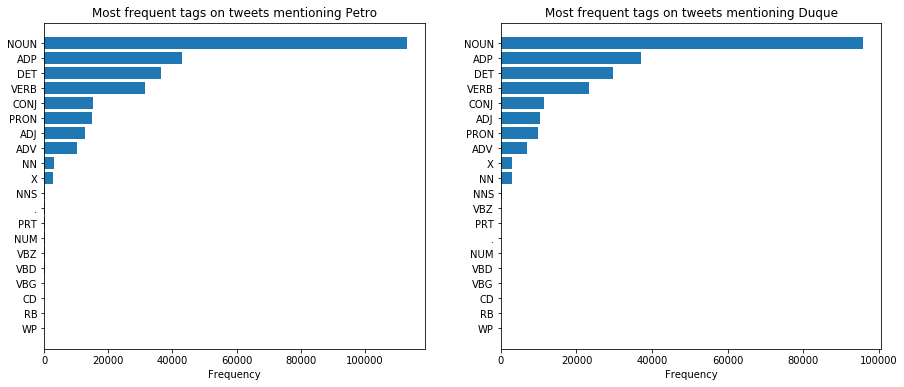

In [80]:
ypos = np.arange(20)

fig, (ax, ax2) = plt.subplots(ncols=2, figsize=(15, 6))

petro_data = dict(sorted_tags['petro'])
duque_data = dict(sorted_tags['duque'])

ax.barh(ypos, list(petro_data.values()), align='center')
ax.set_yticks(ypos)
ax.set_yticklabels(list(petro_data.keys()))
ax.set_xlabel('Frequency')
ax.set_title("Most frequent tags on tweets mentioning Petro")
ax.invert_yaxis()

ax2.barh(ypos, list(duque_data.values()), align='center')
ax2.set_yticks(ypos)
ax2.set_yticklabels(list(duque_data.keys()))
ax2.set_xlabel('Frequency')
ax2.set_title("Most frequent tags on tweets mentioning Duque")
ax2.invert_yaxis()

plt.show()

Here we've got the results.

They don't really seem very interesting.

The most frequent tag in both cases was NOUN. This makes complete sense, because all of the hashtags and twitter handles are being tagged as nouns. Also, all of the words that cannot be correctly tagged, are tagged as NOUNs.

Then come the ADP and DET tags. Which makes a lot of sense, because most of the stopwords fall into these tags, and as was seen on the previous notebook, stopwords have the highest frequencies in text.

The only difference that's probably worth mentioning, is that the tweets mentioning Ivan Duque contained more adjectives than those mentioning Gustavo Petro. This could be because of his followers flattering him, or because of his oppositors insulting him.